In [2]:
# Import Libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

In [3]:
# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")  # import data set form https://huggingface.co/datasets/lukebarousse/data_jobs
df = dataset["train"].to_pandas()  # change datatype

In [4]:
# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

#### Simple Example

In [5]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

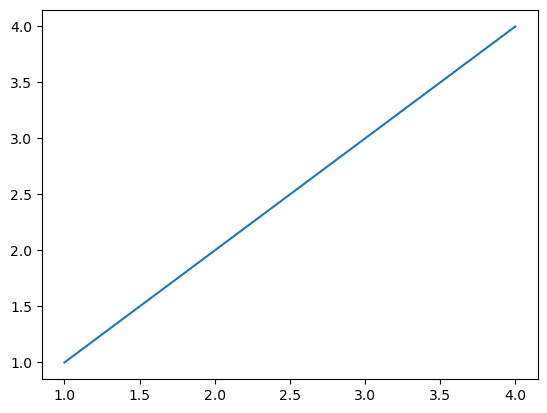

In [8]:
plt.plot(x, y)

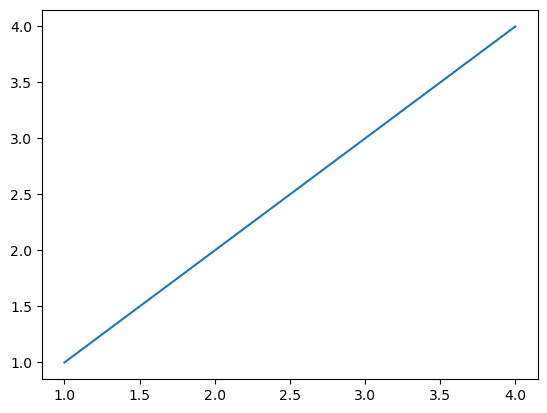

In [9]:
plt.plot(x, y)
plt.show()  # remove object information

#### Plotting Job Postings Dates

In [12]:
df.job_posted_date.head()

0   2023-06-16 13:44:15
1   2023-01-14 13:18:07
2   2023-10-10 13:14:55
3   2023-07-04 13:01:41
4   2023-08-07 14:29:36
Name: job_posted_date, dtype: datetime64[ns]

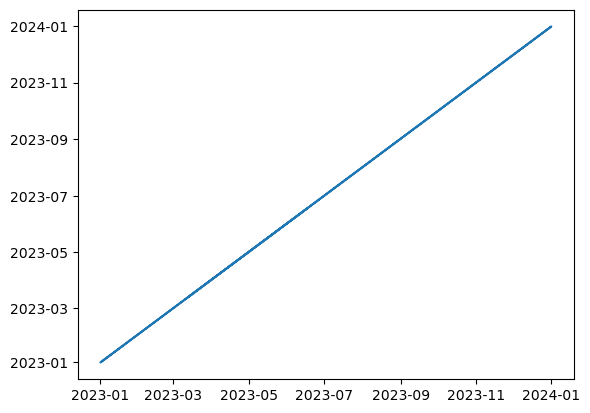

In [13]:
plt.plot(df.job_posted_date, df.job_posted_date)

In [17]:
df.job_posted_date.value_counts()

job_posted_date
2023-12-08 07:24:37    10
2023-01-08 00:19:57    10
2023-09-17 00:28:49    10
2023-09-07 00:07:24    10
2023-07-22 07:25:54    10
                       ..
2023-05-17 17:27:41     1
2023-05-28 17:51:07     1
2023-09-05 17:10:27     1
2023-09-02 17:02:18     1
2023-03-12 06:32:36     1
Name: count, Length: 607192, dtype: int64

In [20]:
date_counts = df.job_posted_date.value_counts()

date_counts = date_counts.sort_index()

In [21]:
type(date_counts)

pandas.core.series.Series

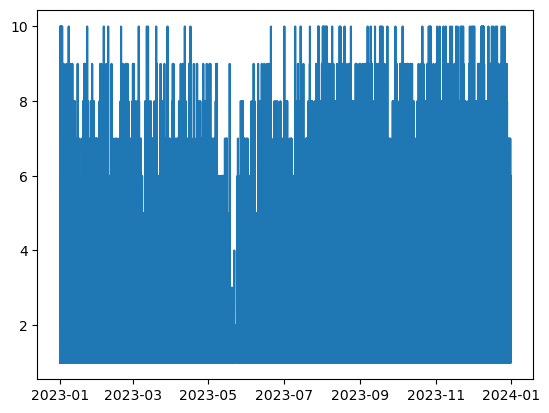

In [22]:
plt.plot(date_counts.index, date_counts)  # uncorrect aggregation --> we have time for example 2022-12-31 

In [23]:
# aggregating by month
df["job_posted_month"] = df["job_posted_date"].dt.month  # new col with months

In [25]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,6
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",10
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",7
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",3
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",3


In [28]:
monthly_counts = df.job_posted_month.value_counts()
monthly_counts = monthly_counts.sort_index()
monthly_counts

job_posted_month
1     91822
2     64578
3     64084
4     62919
5     52104
6     61572
7     63777
8     75162
9     62359
10    66611
11    64450
12    56303
Name: count, dtype: int64

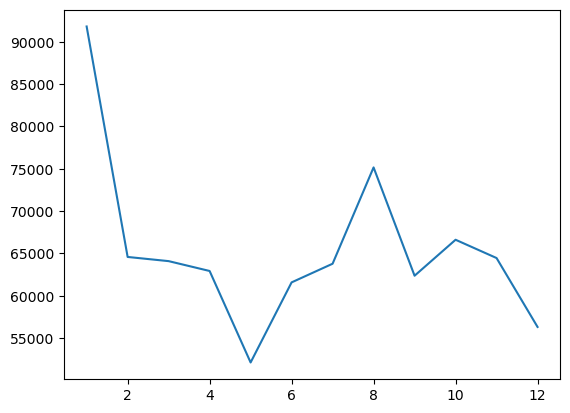

In [31]:
plt.plot(monthly_counts.index, monthly_counts.values)  

#### Series vs DataFrame
- One-Dimensional
- Indexed
- Diverse Data Types

In [32]:
pd.Series([10, 20, 30, 40 , 50])

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [33]:
pd.Series([10, 20, 30, 40 , 50], index=["a", "b", "c", "d", "e"])

a    10
b    20
c    30
d    40
e    50
dtype: int64

In [34]:
series = pd.Series([10, 20, 30, 40 , 50], index=["a", "b", "c", "d", "e"])

In [35]:
series.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [36]:
series.values

array([10, 20, 30, 40, 50], dtype=int64)

In [37]:
type(df.job_posted_date)  # Series

pandas.core.series.Series

### Bar Chart - Counts of Job Postings

In [38]:
df.job_title_short

0         Senior Data Engineer
1                 Data Analyst
2                Data Engineer
3                Data Engineer
4                Data Engineer
                  ...         
785736       Software Engineer
785737            Data Analyst
785738        Business Analyst
785739           Data Engineer
785740       Software Engineer
Name: job_title_short, Length: 785741, dtype: object

In [39]:
df.job_title_short.value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [45]:
job_counts = df.job_title_short.value_counts()

<BarContainer object of 10 artists>

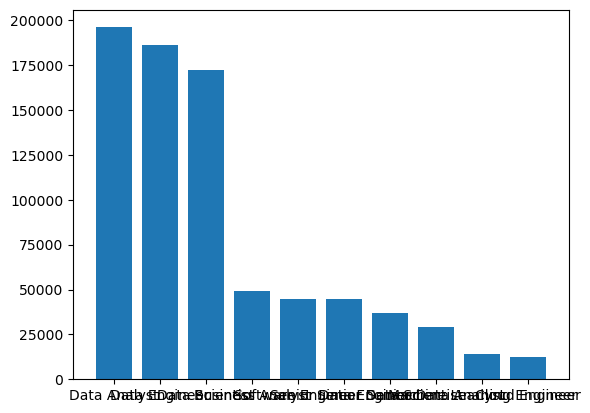

In [46]:
plt.bar(job_counts.index, job_counts)  # need to use horizontal bar plot --> not enough space for text

<BarContainer object of 10 artists>

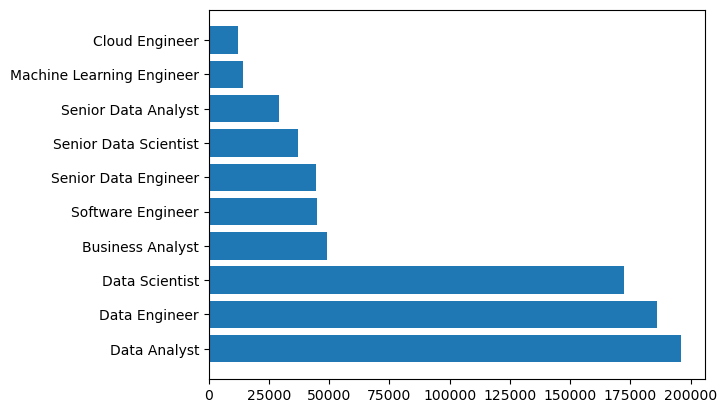

In [47]:
plt.barh(job_counts.index, job_counts)  # need to sort it by ascending order

In [52]:
job_counts.sort_values(ascending=True)

job_title_short
Cloud Engineer                12331
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Scientist         36957
Senior Data Engineer          44563
Software Engineer             44929
Business Analyst              49063
Data Scientist               172286
Data Engineer                186241
Data Analyst                 196075
Name: count, dtype: int64

In [50]:
job_counts = job_counts.sort_values(ascending=True)

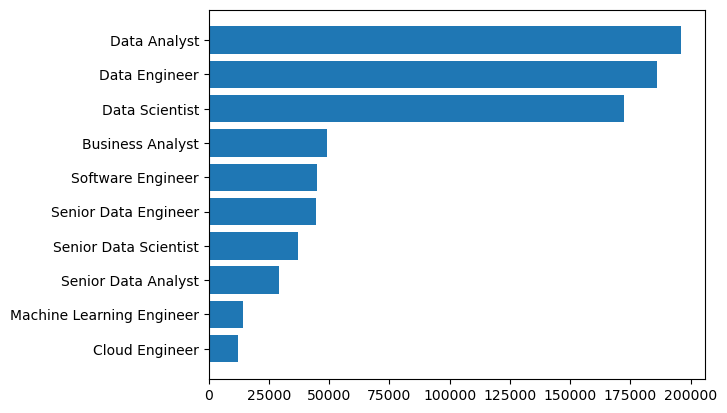

In [53]:
plt.barh(job_counts.index, job_counts)
plt.show()